<a href="https://colab.research.google.com/github/abdullahkhafabi-010/PCVK/blob/main/WEEK10/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Abdullah Khafabi

Nim: 2041720050

Kelas: 3A

# MODUL 10 – GLOBAL THRESHOLDING

1. import folder yang ada di Drive

In [1]:
from google.colab import drive

#Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
bawah.

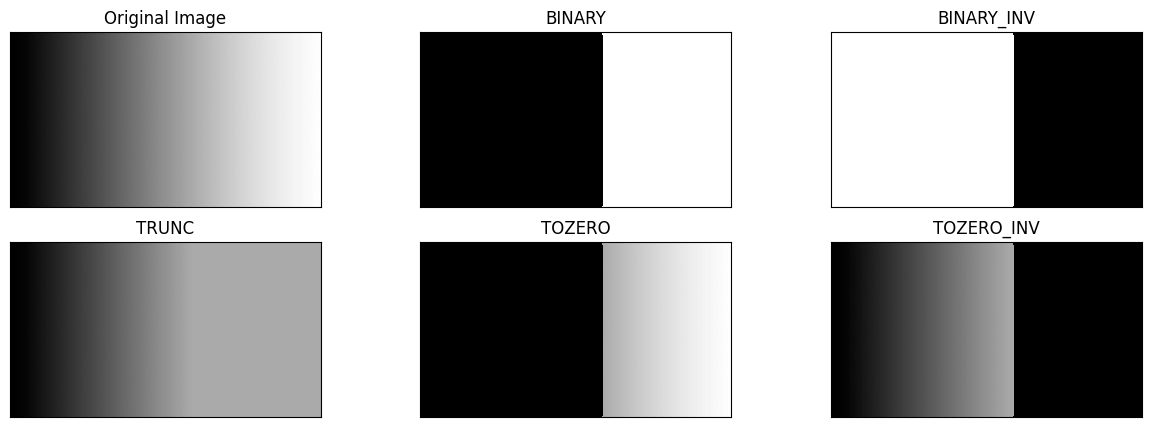

In [6]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
filename = ('/content/drive/MyDrive/PCVK/Images/gradient.jpg')
img = cv.imread(filename)
thresh = 170 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
 plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

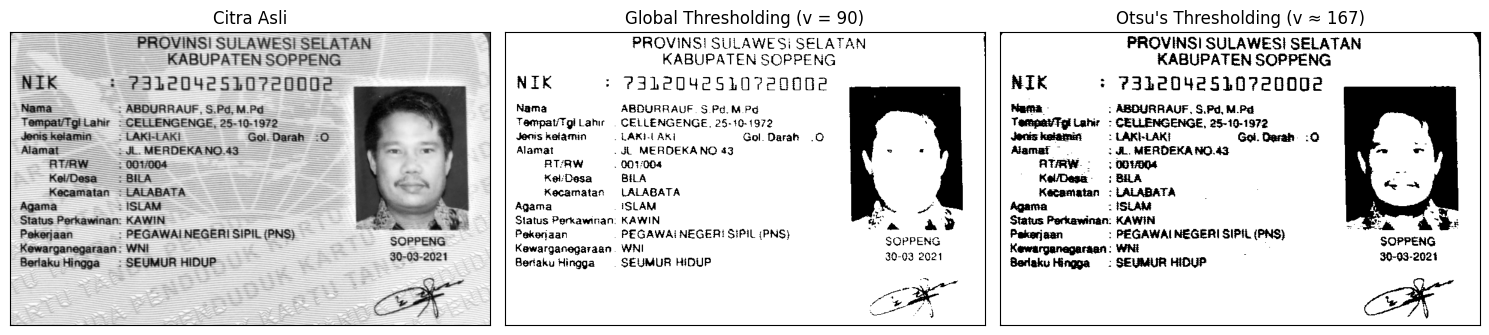

In [32]:
import cv2 as cv
import matplotlib.pyplot as plt

filename = '/content/drive/MyDrive/PCVK/Images/KTP.jpeg'
img = cv.imread(filename, 0)

# Global Thresholding
ret1, th1 = cv.threshold(img, 90, 255, cv.THRESH_BINARY)

# Otsu's thresholding
ret2, th2 = cv.threshold(img, 167, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Plotting citra asli, Global Thresholding, dan Otsu's Thresholding
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, 'gray')
plt.title("Citra Asli")
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(th1, 'gray')
plt.title("Global Thresholding (v = 90)")
plt.xticks([]), plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(th2, 'gray')
plt.title("Otsu's Thresholding (v ≈ 167)")
plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()


5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
Petunjuk:

>   a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.


>  b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html


>  c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
  yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
  histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
  dimasking warna putih yang akan dihitung histogramnya (dari contoh
  dibawah dinamakan dengan Citra Segment).







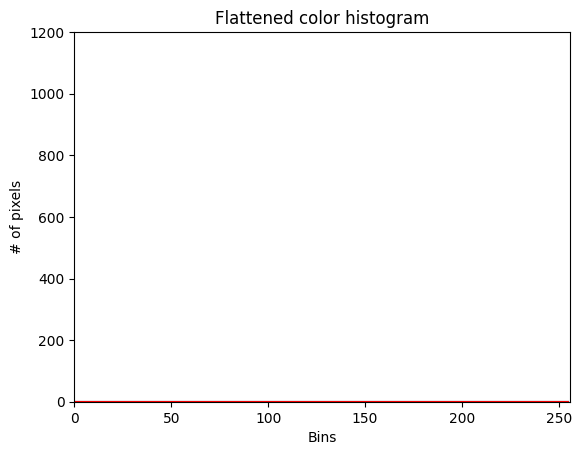

In [49]:
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np

img = cv.imread('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')

# Buat mask (misalnya, mask putih untuk area tertentu)
# Disini digunakan contoh untuk membuat mask putih pada area dengan batas (x1, y1) dan (x2, y2)
mask = np.zeros(img.shape[:2], np.uint8)
#mask[y1:y2, x1:x2] = 255

chans = cv.split(img)
colors = 'b', 'g', 'r'

plt.figure()
plt.title('Flattened color histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')

for (chan, color) in zip(chans, colors):
    hist = cv.calcHist([chan], [0], mask, [256], [0, 255])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
    plt.ylim([0, 1200])

plt.show()


(<Axes: >, <matplotlib.image.AxesImage at 0x7cf45a7d70a0>)

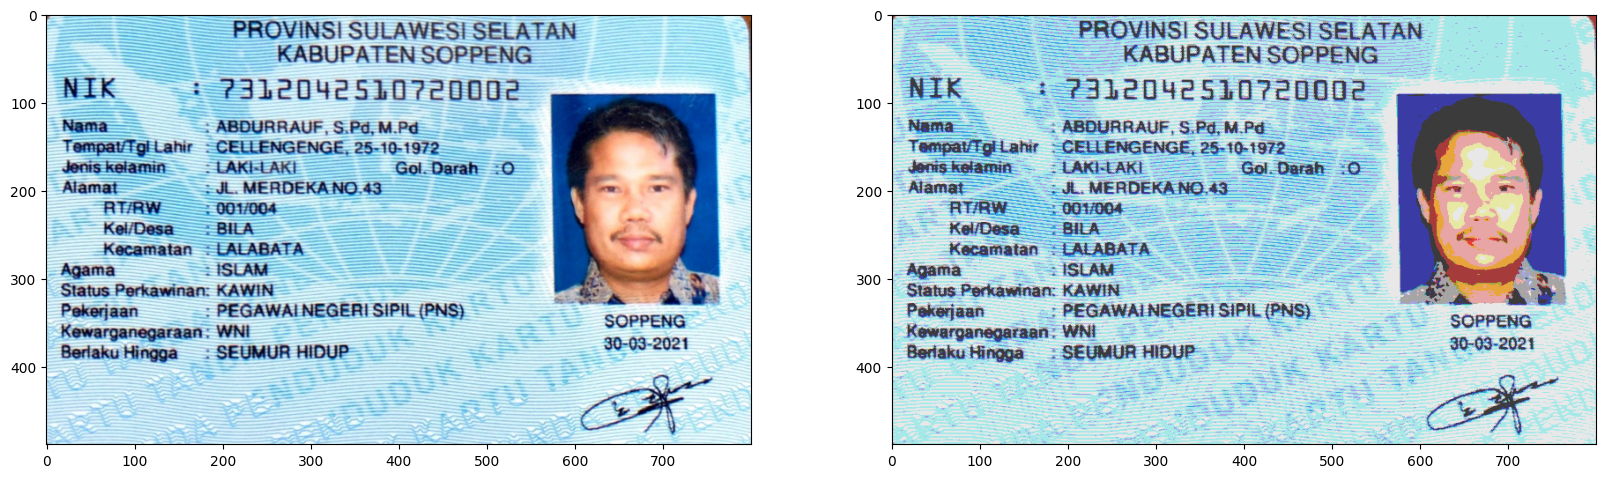

In [78]:
#KMeans Image Segmentation
filename = ('/content/drive/MyDrive/PCVK/Images/KTP.jpeg')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
'''
kita akan menggunakan fungsi cv.kmeans() yang meminta array 2D sebagai masu
kan, sedangkan image aslinya adalah array 3D
selanjutnya kita perlu melakukan flattening array image masukan
'''
#reshape array ke bentuk 2D
pixel_values = img.reshape((-5, 1))
# convert to float
pixel_values = np.float32(pixel_values)
'''
syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu
banyak pergeseran posisi antara interasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka
kita akan hentikan iterasi saat jumlah iterasi = 100
atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di ite
rasi sebelumnya) < 0.2
'''
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
'''
jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan
 putih/orange). untuk percobaan ini kita akan gunakan
3 cluster untuk image ini
'''
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(segmented_image)


In [77]:
# ubah pixel di cluster 2 menjadi hitam
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
((-5, 1))
# cluster yang diubah
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)
plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(segmented_image)
plt.subplot(2,2,3),plt.imshow(masked_image)

ValueError: ignored

buatlah histogram citra yang sama akan tetapi menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?

In [57]:
# Equalize Histogram for each color channel separately
eq_channels = [cv.equalizeHist(ch) for ch in cv.split(img1)]
eq_img1 = cv.merge(eq_channels)

# Calculate histogram for the equalized image
eq_histo = histog(eq_img1)

# Display the equalized image
final_frame = cv.hconcat((img1, eq_img1))  # Menggabungkan gambar
cv2_imshow(final_frame)

# Compare histograms before and after equalization
fig, axs = plt.subplots(2, 3, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB Plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0, 0].bar(color_ranges, histo_asli[2], color='red')
axs[0, 1].bar(color_ranges, histo_asli[1], color='green')
axs[0, 2].bar(color_ranges, histo_asli[0], color='blue')
axs[1, 0].bar(color_ranges, eq_histo[2], color='red')
axs[1, 1].bar(color_ranges, eq_histo[1], color='green')
axs[1, 2].bar(color_ranges, eq_histo[0], color='blue')

plt.show()

plt.show()

NameError: ignored

hasilnya berbeda, yang tidak menggunakan library yang di miliki CV2 berwarna keunguan dan untuk yang menggunakan library berwarna biru

Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam, hijau, kuning, biru, cyan, magenta, putih

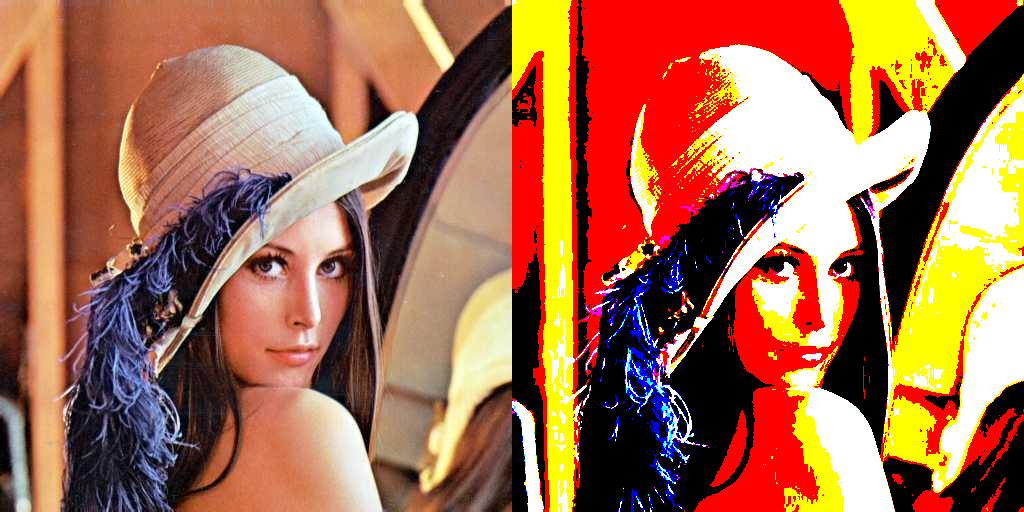

In [ ]:
img_1 = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]

img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)

Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image awal, dan tampilan setelah dithering)

In [ ]:
pip install pillow

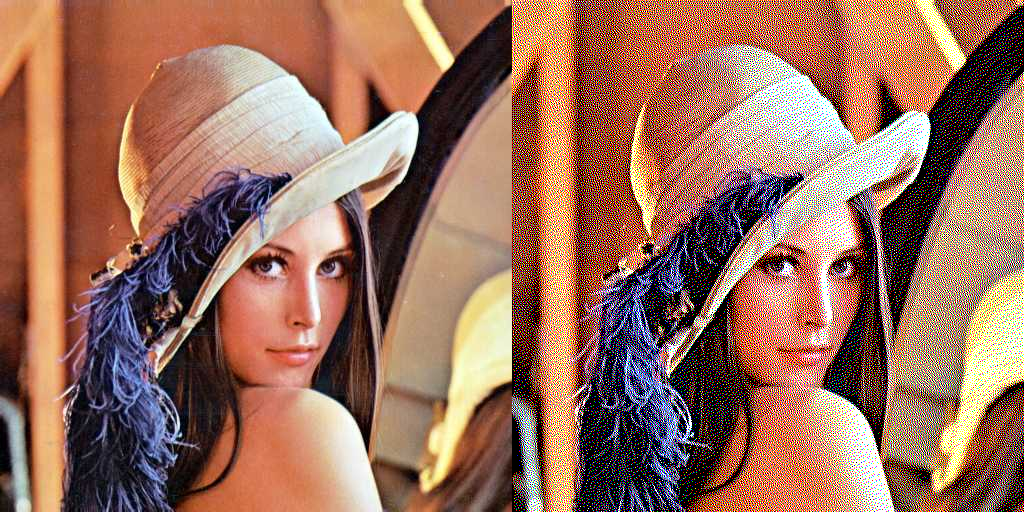

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/lena.jpg')

# Konversi ke tipe float
img_float = np.float64(img)

# Ukuran gambar
height, width, channels = img.shape

# Proses dithering Floyd and Steinberg pada setiap saluran warna
for y in range(height):
    for x in range(width):
        for c in range(channels):  # Loop untuk setiap saluran warna (R, G, B)
            old_value = img_float[y, x, c]
            new_value = round(old_value / 255) * 255
            img_float[y, x, c] = new_value

            error = old_value - new_value

            if x < width - 1:
                img_float[y, x + 1, c] += error * 7 / 16
            if y < height - 1:
                if x > 0:
                    img_float[y + 1, x - 1, c] += error * 3 / 16
                img_float[y + 1, x, c] += error * 5 / 16
                if x < width - 1:
                    img_float[y + 1, x + 1, c] += error * 1 / 16

# Konversi kembali ke tipe uint8
output_img = np.uint8(img_float)

# Menampilkan gambar awal dan hasil dithering
final_frame = cv.hconcat((img, output_img))
cv2_imshow(final_frame)

Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil histogram equalization implementasikan proses dithering Floyd and Steinberg

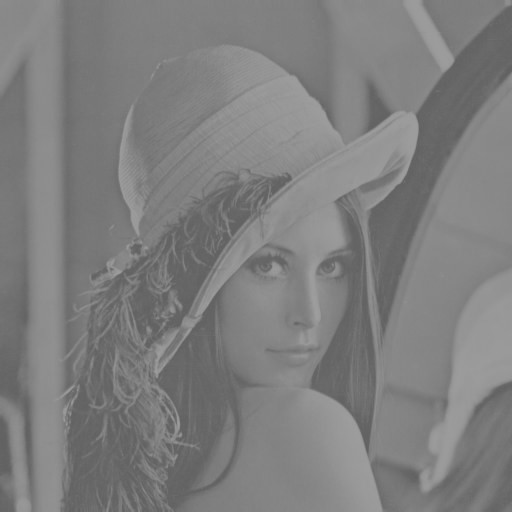

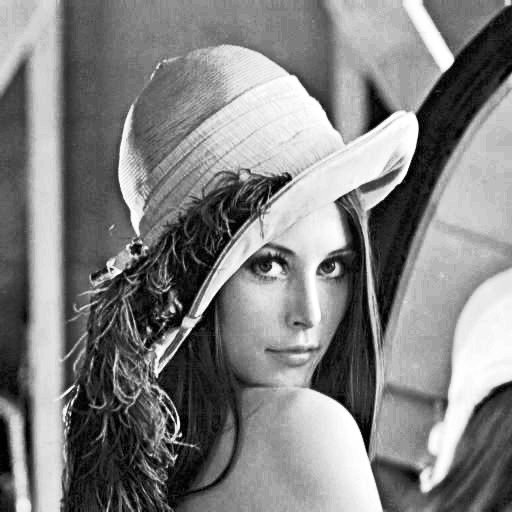

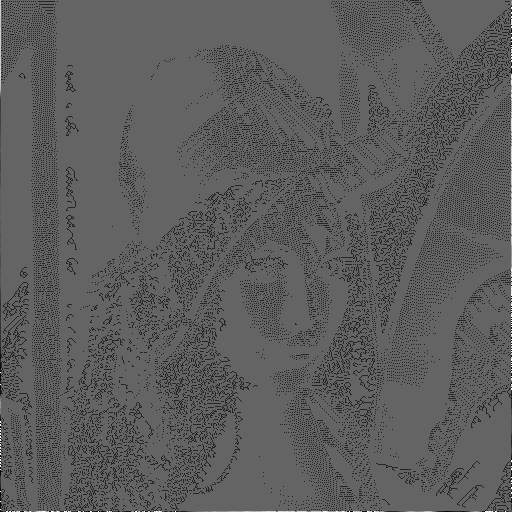

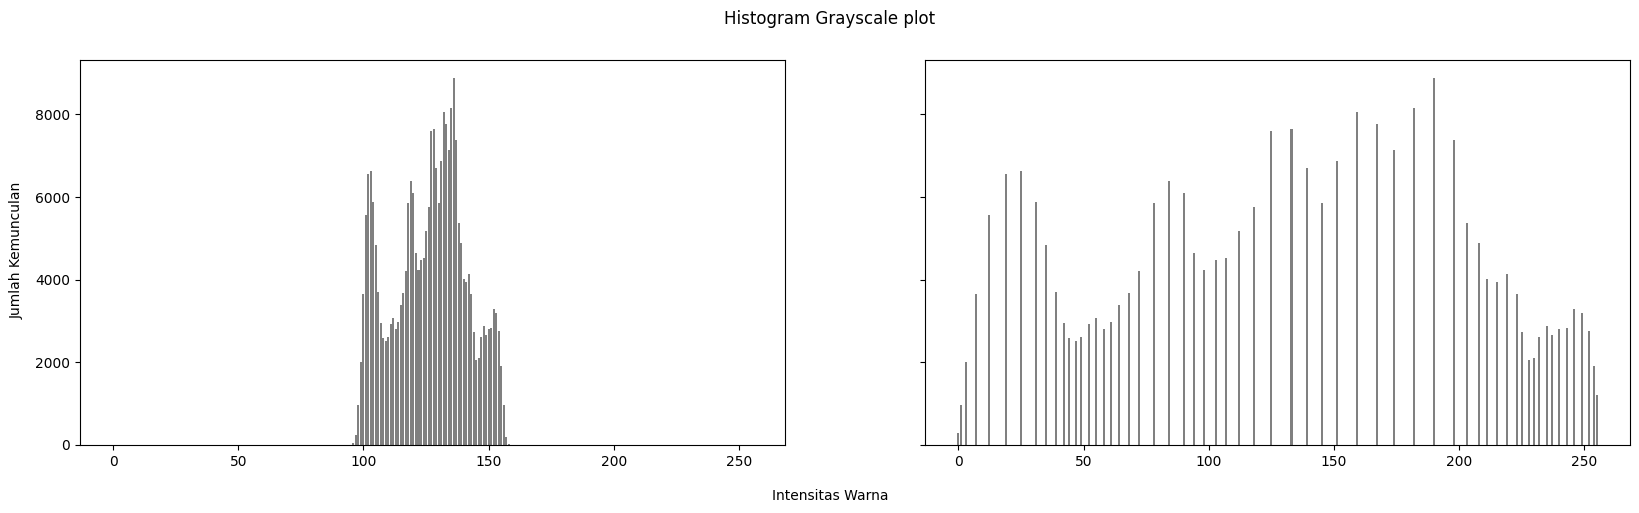

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Baca citra asli
image = cv2.imread("/content/drive/MyDrive/PCVK/Images/lena_lc.jpg", cv2.IMREAD_GRAYSCALE)

# Terapkan histogram equalization
equalized_image = cv2.equalizeHist(image)

# Implementasikan proses dithering Floyd-Steinberg
height, width = equalized_image.shape[0], equalized_image.shape[1]
dithered_image = np.copy(equalized_image)

threshold = 230

for y in range(height - 1):
    for x in range(1, width - 1):
        old_pixel = dithered_image[y, x]
        new_pixel = 550 if old_pixel >= threshold else 100
        dithered_image[y, x] = new_pixel
        quantization_error = old_pixel - new_pixel
        dithered_image[y, x + 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x - 1] += quantization_error * 1 / 16
        dithered_image[y + 1, x] += quantization_error * 3 / 16
        dithered_image[y + 1, x + 1] += quantization_error * 3 / 16

# Hitung histogram untuk citra grayscale asli dan citra hasil equalization
histo_asli = cv2.calcHist([image], [0], None, [256], [0, 256])
histo_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Menampilkan histogram grayscale
fig, axs = plt.subplots(1, 2, figsize=[20, 5], sharex=True, sharey=True)
fig.suptitle('Histogram Grayscale plot')
fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0, 'Intensitas Warna', ha='center')
axs[0].bar(range(256), histo_asli[:,0], color='gray')
axs[1].bar(range(256), histo_equalized[:,0], color='gray')

# Tampilkan citra hasil
cv2_imshow(image)
cv2_imshow(equalized_image)
cv2_imshow(dithered_image)